In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_dev = pd.read_csv('dataset/development.csv')
df_eval = pd.read_csv('dataset/evaluation.csv')

df = pd.concat([df_dev, df_eval], sort=False)
df.head()

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900.0,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300.0,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700.0,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500.0,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400.0,tech,thursday


## Data exploration

In [8]:
len(df_dev), len(df_eval), len(df)

(31715, 7917, 39632)

In [13]:
df.isna().any(axis=0).sort_values(ascending=False)

num_keywords                     True
shares                           True
num_imgs                         True
num_videos                       True
min_positive_polarity           False
LDA_03                          False
LDA_04                          False
global_subjectivity             False
global_sentiment_polarity       False
global_rate_positive_words      False
global_rate_negative_words      False
rate_positive_words             False
rate_negative_words             False
avg_positive_polarity           False
id                              False
max_positive_polarity           False
LDA_01                          False
avg_negative_polarity           False
min_negative_polarity           False
max_negative_polarity           False
title_subjectivity              False
title_sentiment_polarity        False
abs_title_subjectivity          False
abs_title_sentiment_polarity    False
data_channel                    False
LDA_02                          False
self_referen

In [10]:
df_dev['shares'].isna().sum()

0

### Univariate analysis

#### Target variable (shares)
- There are some outliers in the target feature.

count     31715.000000
mean       3407.068863
std       11899.460219
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


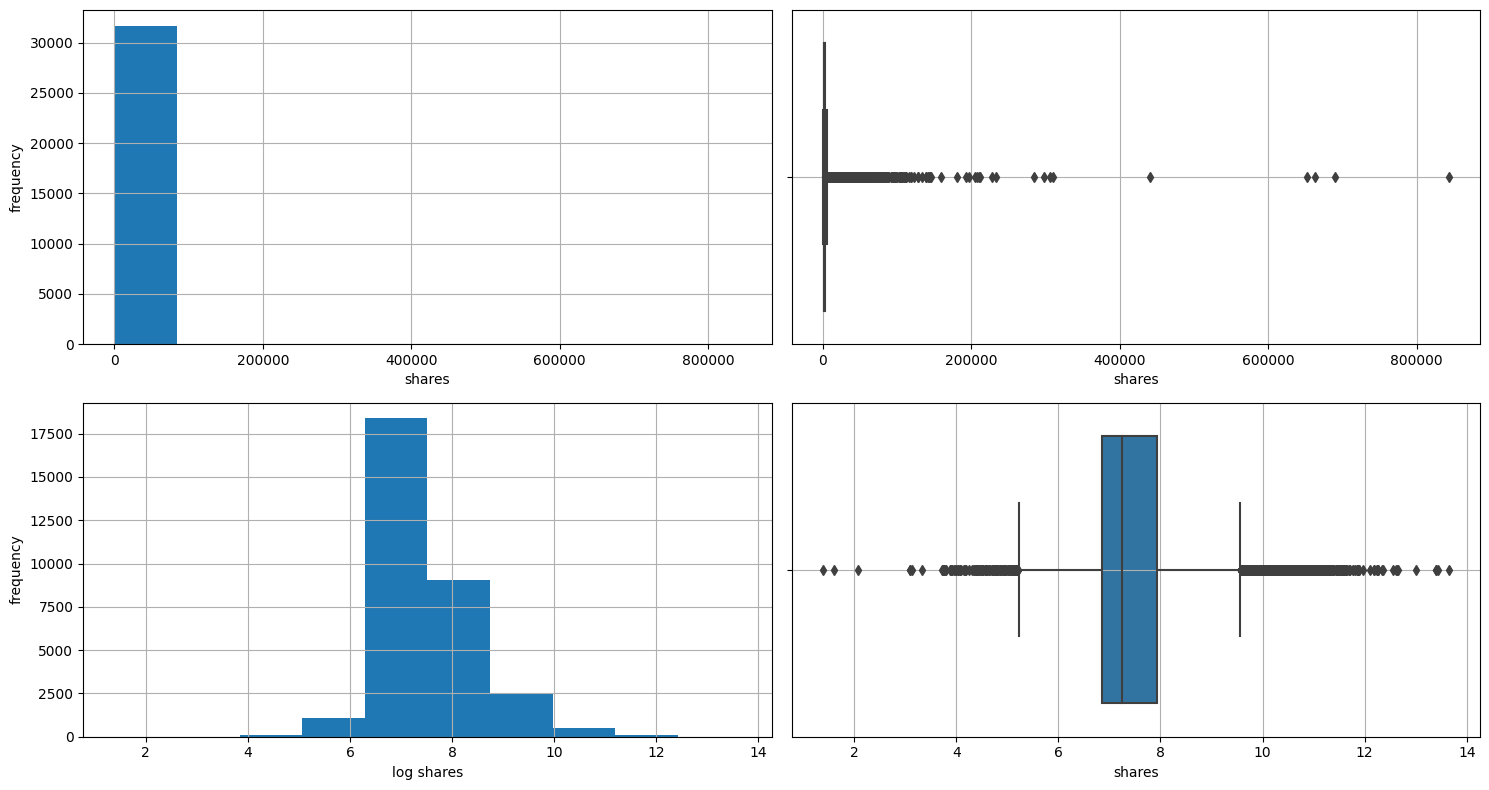

In [31]:
# Shares features
print(df_dev['shares'].describe())

fig, ax = plt.subplots(2,2, figsize=(15,8))
ax[0][0].hist(df_dev['shares'])
ax[0][0].grid()
ax[0][0].set_xlabel('shares')
ax[0][0].set_ylabel('frequency')
sns.boxplot(x=df_dev['shares'], ax=ax[0][1])
ax[0][1].grid()

ax[1][0].hist(np.log(df_dev['shares']))
ax[1][0].grid()
ax[1][0].set_xlabel('log shares')
ax[1][0].set_ylabel('frequency')
sns.boxplot(x=np.log(df_dev['shares']), ax=ax[1][1])
ax[1][1].grid()
plt.tight_layout()
plt.show()

#### Temporal features
- The data distribution of weekday feature is quite balance but the weekend days (Saturday and Sunday).
- Most of the articles were collected within 100 days after the publishment

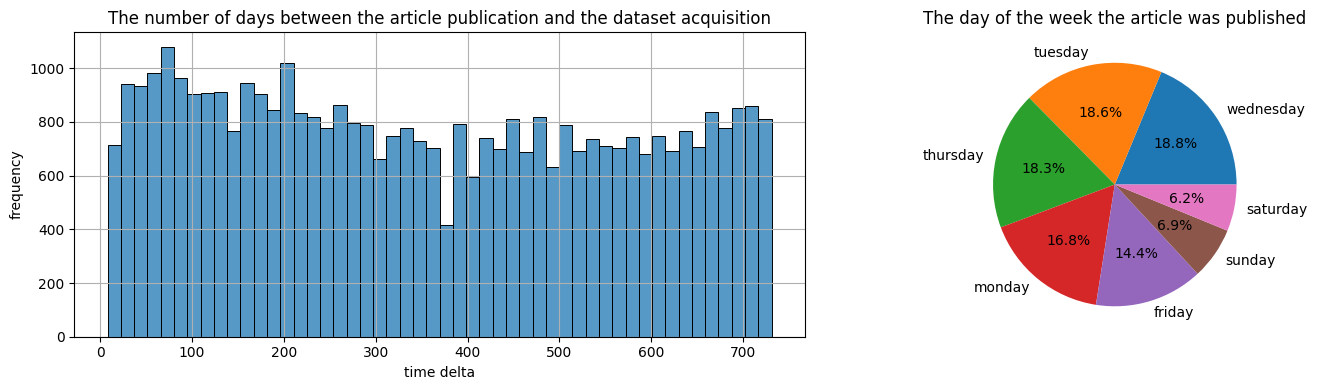

In [61]:
# Temporal features
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df['timedelta'], bins=50, kde=False, ax=ax[0])
ax[0].set_xlabel('time delta')
ax[0].set_ylabel('frequency')
ax[0].set_title('The number of days between the article publication and the dataset acquisition')
ax[0].grid()
weekday_percentage = (df['weekday'].value_counts() / df['weekday'].count())
ax[1].pie(weekday_percentage, labels=weekday_percentage.index, autopct='%1.1f%%')
ax[1].set_title('The day of the week the article was published')
plt.tight_layout()
plt.show()

#### Sentiment features
- All the "global_*" features are centered to 0 and are distributed like a Normal random variable
- It is not easy to understand if it preferable to use the "rate_*_words" or the "global_rate_*_words" features... For this reason we choose to make a correlation analysis with the target feature
- "min_positive_polarity" and "max_negative_polarity" have quite a similar distribution

global_subjectivity             0
global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
rate_positive_words             0
rate_negative_words             0
avg_positive_polarity           0
min_positive_polarity           0
max_positive_polarity           0
avg_negative_polarity           0
min_negative_polarity           0
max_negative_polarity           0
title_subjectivity              0
abs_title_subjectivity          0
title_sentiment_polarity        0
abs_title_sentiment_polarity    0
dtype: int64


array([[<Axes: title={'center': 'global_subjectivity'}>,
        <Axes: title={'center': 'global_sentiment_polarity'}>,
        <Axes: title={'center': 'global_rate_positive_words'}>,
        <Axes: title={'center': 'global_rate_negative_words'}>],
       [<Axes: title={'center': 'rate_positive_words'}>,
        <Axes: title={'center': 'rate_negative_words'}>,
        <Axes: title={'center': 'avg_positive_polarity'}>,
        <Axes: title={'center': 'min_positive_polarity'}>],
       [<Axes: title={'center': 'max_positive_polarity'}>,
        <Axes: title={'center': 'avg_negative_polarity'}>,
        <Axes: title={'center': 'min_negative_polarity'}>,
        <Axes: title={'center': 'max_negative_polarity'}>],
       [<Axes: title={'center': 'title_subjectivity'}>,
        <Axes: title={'center': 'abs_title_subjectivity'}>,
        <Axes: title={'center': 'title_sentiment_polarity'}>,
        <Axes: title={'center': 'abs_title_sentiment_polarity'}>]],
      dtype=object)

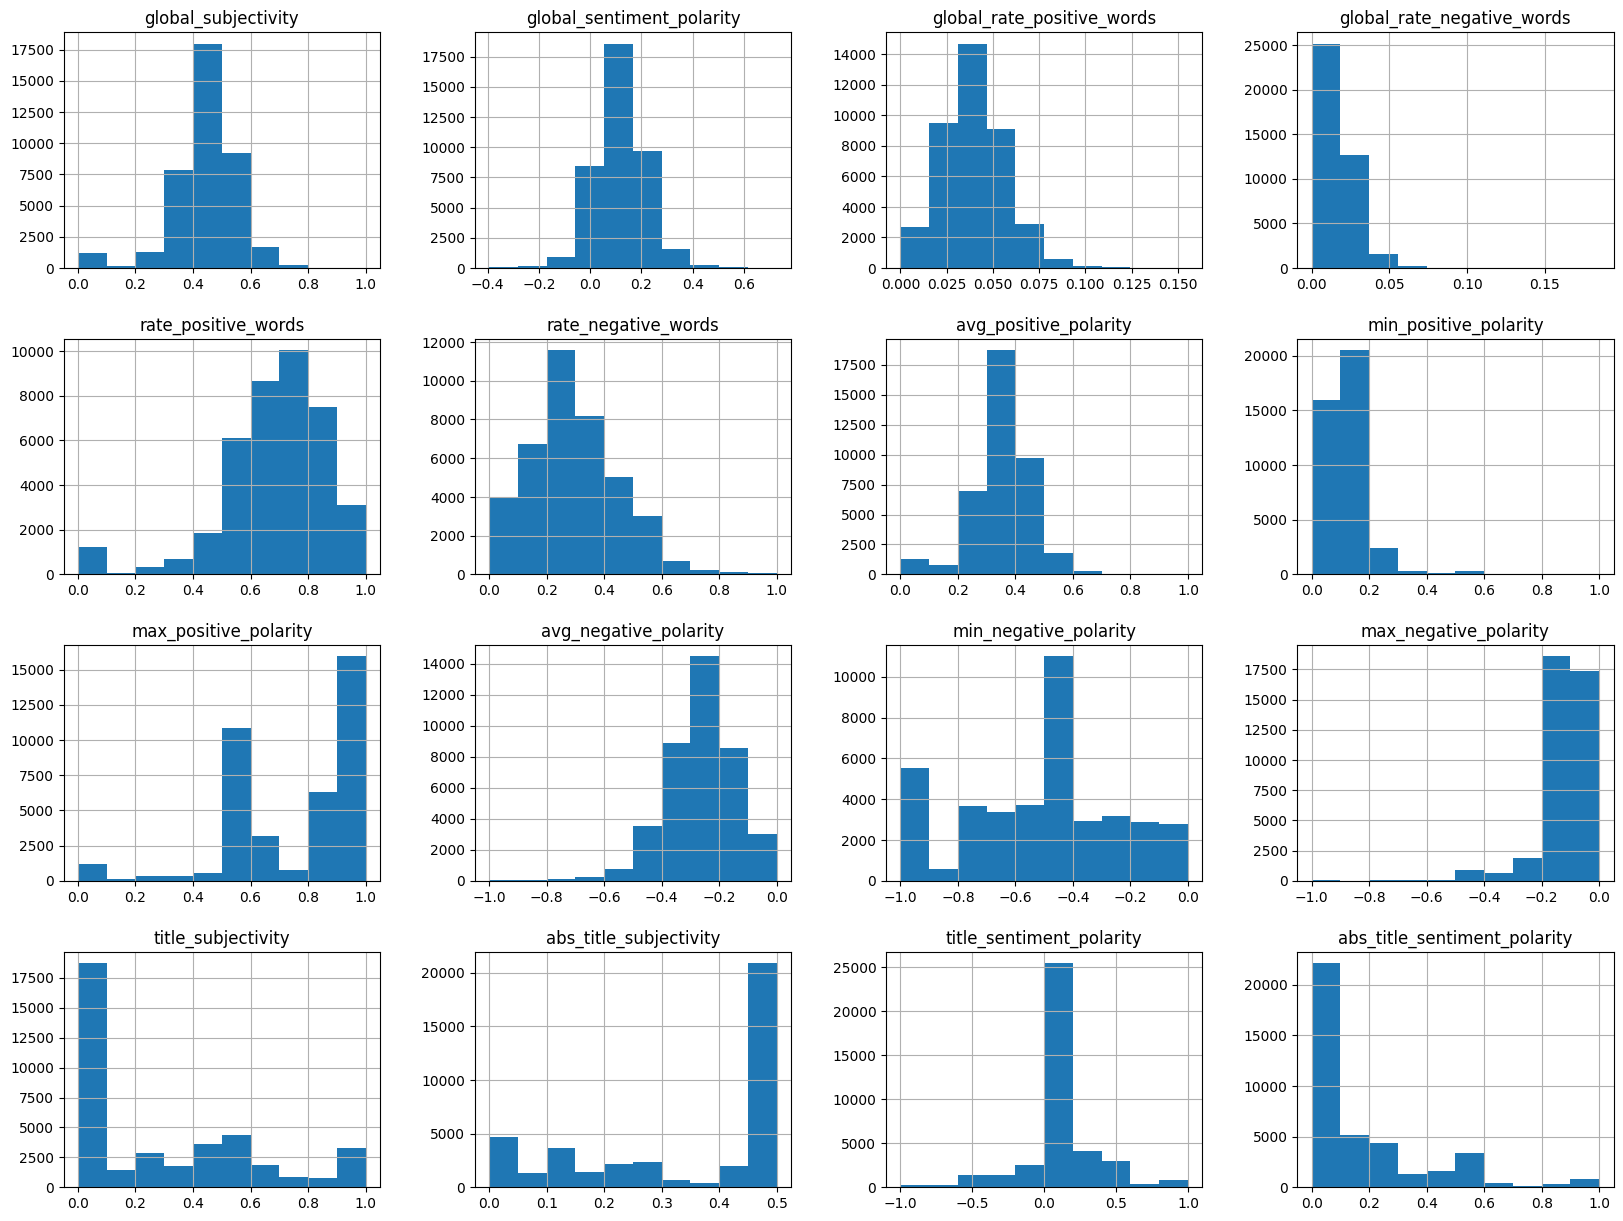

In [64]:
df_sentiment = df[['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words',
                   'rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity',
                   'max_negative_polarity','title_subjectivity','abs_title_subjectivity','title_sentiment_polarity','abs_title_sentiment_polarity']]
print(df_sentiment.isna().sum())
df_sentiment.hist(figsize=(20,15),layout=(4,4))